## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how='outer')
merge_df = pd.DataFrame(merge_data)

merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice in the DataFrame.
micenum_df=merge_df["Mouse ID"].nunique()
micenum_df

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#duplicateDFRow = dfObj[dfObj.duplicated(['Name', 'Seasons'])]

duplicateDFRow = merge_df[merge_df.duplicated(['Mouse ID', 'Timepoint'])]
print(duplicateDFRow)


    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
 
merge_df.set_index('Mouse ID', inplace=True)
merge_df.drop('g989', inplace=True)
merge_df.reset_index(inplace=True)
merge_df



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice in the clean DataFrame.
micenum_df=merge_df["Mouse ID"].nunique()
micenum_df

248

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

#convert to DF to use .groupby
combined_df = pd.DataFrame(merge_df)

mean = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdv = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

statistics_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": stdv,"SEM": sem})

statistics_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

<function matplotlib.pyplot.show(*args, **kw)>

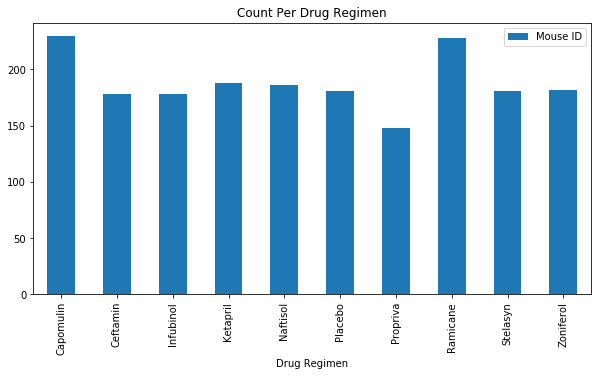

In [7]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
combined_df = pd.DataFrame(merge_df.groupby(["Drug Regimen"]).count()).reset_index()
data_points=combined_df[["Drug Regimen", "Mouse ID"]]
data_points=data_points.set_index("Drug Regimen")
data_points.plot(kind="bar", figsize=(10,5))
plt.title("Count Per Drug Regimen")
plt.show

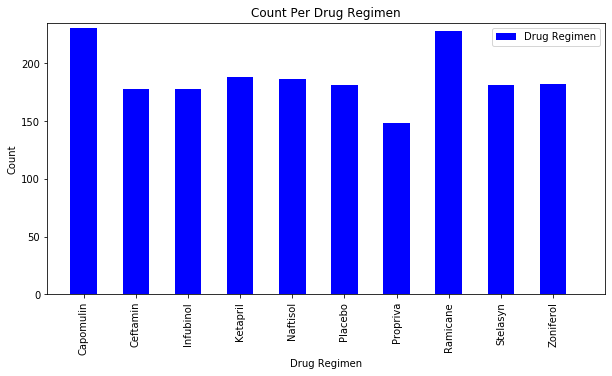

In [8]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

treatment_reg=statistics_df.index.tolist()
#treatment_reg

x_axis=np.arange(len(combined_df))


plt.figure(figsize=(10,5))
plt.bar(combined_df["Drug Regimen"], combined_df["Mouse ID"], color='blue',align='center',width=0.51)
plt.xticks(rotation='vertical')


plt.xlim(-0.7,len(x_axis))
plt.ylim(0,max(combined_df['Mouse ID'])+5)

plt.title('Count Per Drug Regimen')
plt.xlabel("Drug Regimen")
plt.ylabel("Count")

column_name=["Drug Regimen"]
plt.legend(column_name, loc='best')

plt.show()

## Pie Plots

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_grp=merge_df.groupby('Sex')
sex_grp_count = pd.DataFrame(sex_grp['Sex'].count())
sex_grp_count.head()

,Sex
Sex,
Female,922
Male,958


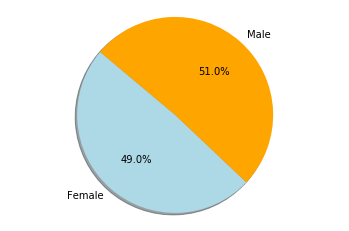

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender=list(sex_grp_count.index.values)
pie_values=sex_grp_count["Sex"]
colors=["lightblue", "orange"]

plt.pie(pie_values, labels=gender,colors=colors,autopct="%1.1f%%", shadow=True, startangle=140)
plt.rcParams['font.size']=16
plt.title=("Distribution of Female Versus Male Mice")
plt.ylabel=("Sex")       
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [11]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
four_drugs_df=merge_df.loc[(merge_df['Drug Regimen']=='Capomulin') |
                        (merge_df['Drug Regimen']=='Ramicane') |
                        (merge_df['Drug Regimen']=='Infubinol') |
                        (merge_df['Drug Regimen']=='Ceftamin')]

four_drugs_df.reset_index()
treatment_df=four_drugs_df.groupby(['Mouse ID']).nth(-1)
treatment_df.sort_values(by=['Mouse ID'])


tumor_vol_d1=treatment_df[treatment_df['Drug Regimen']=="Capomulin"]["Tumor Volume (mm3)"]
tumor_vol_d2=treatment_df[treatment_df['Drug Regimen']=="Ramicane"]["Tumor Volume (mm3)"]
tumor_vol_d3=treatment_df[treatment_df['Drug Regimen']=="Infubinol"]["Tumor Volume (mm3)"]
tumor_vol_d4=treatment_df[treatment_df['Drug Regimen']=="Ceftamin"]["Tumor Volume (mm3)"]
treatment_df
tumor_vol_d4

Mouse ID
a275    62.999356
b447    45.000000
b487    56.057749
b759    55.742829
f436    48.722078
h531    47.784682
j296    61.849023
k210    68.923185
l471    67.748662
l490    57.918381
l558    46.784535
l661    59.851956
l733    64.299830
o287    59.741901
p438    61.433892
q483    64.192341
t573    45.000000
u149    52.925348
u153    45.000000
w151    67.527482
x226    45.000000
x581    64.634949
x822    61.386660
y769    68.594745
y865    64.729837
Name: Tumor Volume (mm3), dtype: float64

In [12]:
#Capomulin
quartiles=tumor_vol_d1.quantile([.25,.5,.75]).round(2)
lowerq = quartiles[.25].round (2)
upperq = quartiles[.75].round(2)
iqr = round(upperq-lowerq,2)
lower_bound = lowerq - ((1.5*iqr),2)
upper_bound = upperq + ((1.5*iqr),2)

print(f"The lower quartile of Capomulin is: {lowerq}")
print(f"The upper quartile of Capomulin is: {upperq}")
print(f"The interquartile range of Capomulin is: {iqr}")
print(f"The the median of Capomulin is: {quartiles[0.5]} ")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of Capomulin is: 32.38
The upper quartile of Capomulin is: 40.16
The interquartile range of Capomulin is: 7.78
The the median of Capomulin is: 38.13 
Values below [20.71 30.38] could be outliers.
Values above [51.83 42.16] could be outliers.


In [13]:
#Ramicane
quartiles=tumor_vol_d2.quantile([.25,.5,.75]).round(2)
lowerq = quartiles[.25].round (2)
upperq = quartiles[.75].round(2)
iqr = round(upperq-lowerq,2)
lower_bound = lowerq - ((1.5*iqr),2)
upper_bound = upperq + ((1.5*iqr),2)

print(f"The lower quartile of Ramicane is: {lowerq}")
print(f"The upper quartile of Ramicane is: {upperq}")
print(f"The interquartile range of Ramicane is: {iqr}")
print(f"The the median of Ramicane is: {quartiles[0.5]} ")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane is: 31.56
The upper quartile of Ramicane is: 40.66
The interquartile range of Ramicane is: 9.1
The the median of Ramicane is: 36.56 
Values below [17.91 29.56] could be outliers.
Values above [54.31 42.66] could be outliers.


In [14]:
#Infubinol
quartiles=tumor_vol_d3.quantile([.25,.5,.75]).round(2)
lowerq = quartiles[.25].round (2)
upperq = quartiles[.75].round(2)
iqr = round(upperq-lowerq,2)
lower_bound = lowerq - ((1.5*iqr),2)
upper_bound = upperq + ((1.5*iqr),2)

print(f"The lower quartile of Infubinol is: {lowerq}")
print(f"The upper quartile of Infubinol is: {upperq}")
print(f"The interquartile range of Infubinol is: {iqr}")
print(f"The the median of Infubinol is: {quartiles[0.5]} ")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Infubinol is: 54.05
The upper quartile of Infubinol is: 65.53
The interquartile range of Infubinol is: 11.48
The the median of Infubinol is: 60.17 
Values below [36.83 52.05] could be outliers.
Values above [82.75 67.53] could be outliers.


In [15]:
#Ceftamin
quartiles=tumor_vol_d4.quantile([.25,.5,.75]).round(2)
lowerq = quartiles[.25].round (2)
upperq = quartiles[.75].round(2)
iqr = round(upperq-lowerq,2)
lower_bound = lowerq - ((1.5*iqr),2)
upper_bound = upperq + ((1.5*iqr),2)

print(f"The lower quartile of Ceftamin is: {lowerq}")
print(f"The upper quartile of Ceftamin is: {upperq}")
print(f"The interquartile range of Ceftamin is: {iqr}")
print(f"The the median of Ceftamin is: {quartiles[0.5]} ")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ceftamin is: 48.72
The upper quartile of Ceftamin is: 64.3
The interquartile range of Ceftamin is: 15.58
The the median of Ceftamin is: 59.85 
Values below [25.35 46.72] could be outliers.
Values above [87.67 66.3 ] could be outliers.


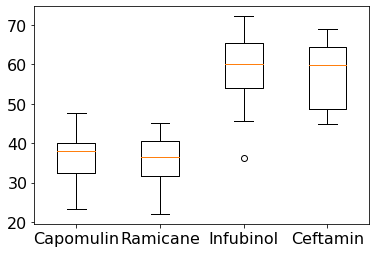

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.figure()
plt.boxplot([tumor_vol_d1, tumor_vol_d2, tumor_vol_d3, tumor_vol_d4],labels=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.xlabel=("Drug Names")
plt.ylabel=("Final Tumor Volume")
plt.title=("Final Tumor Volume of each Mouse across four Regimens of Interest")
plt.show()


## Line and Scatter Plots

In [17]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_reg=merge_df[merge_df["Drug Regimen"]=="Capomulin"].sample()['Mouse ID']
capomulin_reg

134    r554
Name: Mouse ID, dtype: object

TypeError: 'str' object is not callable

<Figure size 432x288 with 0 Axes>

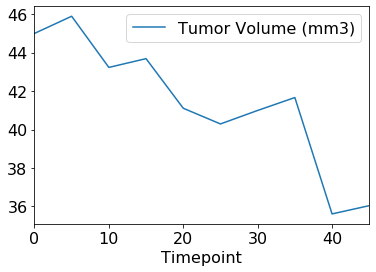

In [18]:
cap_df=merge_df[(merge_df["Mouse ID"]=="w914") & (merge_df["Drug Regimen"]=="Capomulin")]

plt.figure()
cap_df.plot(x='Timepoint', y='Tumor Volume (mm3)')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Time Point Vs Tumor Volume for a Mouse Treated with Capomulin")
plt.tight_layout()
plt.show()

TypeError: 'str' object is not callable

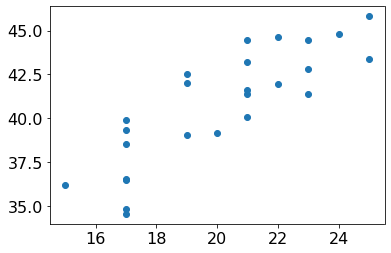

In [19]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_reg=merge_df[merge_df["Drug Regimen"]=="Capomulin"]

avg=capomulin_reg.groupby(["Mouse ID", "Weight (g)"]).mean()["Tumor Volume (mm3)"]
scatter_df=pd.DataFrame(avg)
scatter_df.reset_index(inplace=True)

plt.figure()
plt.scatter(scatter_df["Weight (g)"], scatter_df["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight Vs Average Tumor Volume for the Capomulin Regimen")
plt.show

## Correlation and Regression

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regim"en

x_values=scatter_df["Weight (g)"]
y_values= scatter_df ["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr)- linregress(x_values, y_values)
regress_values-x_values*slope+intercept
line_eq="y=" + str(round(slope,2)) + "x" + str(round(intercept,2))

plt.figure()
plt.scatter(x_values,y_values)
plt.plot(x_values.regress_values,"r-")
plt.annotate(line_eq,(21,38), fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight Vs Average Tumor Volume for the Capomulin Regimen")
plt.show



NameError: name 'slope' is not defined